In [1]:
pattern = TString("scan3/ntuple_1*");

tree = TChain("rechitntupler/hits"); tree2 = TChain("trackimpactntupler/impactPoints"); tree.AddFriend(&tree2);
tree2.Add(pattern);
tree.Add(pattern);

In [2]:
tree.SetMarkerStyle(7) 

In [3]:
// Aliases

In [4]:
tree.SetAlias("rechit_HG","rechit_energyHigh");
tree.SetAlias("rechit_LG","rechit_energyLow");

tree.SetAlias("rechit_id","rechit_channel + 64*rechit_skiroc");

tree.SetAlias("rechit_corry","rechit_y * (-1+2*(rechit_skiroc%2 == 1))");
tree.SetAlias("rechit_corrx","rechit_x * (-1+2*(rechit_skiroc%2 == 1))");

tree.SetAlias("deltaX_tele","rechit_corrx + impactX_HGCal_layer_1");
tree.SetAlias("deltaY_tele","rechit_corry + impactY_HGCal_layer_1");

tree.SetAlias("impactY","(PI_positionY-140 - impactY_HGCal_layer_1)/10. - 0.338");
tree.SetAlias("impactX","(PI_positionX-85  - impactX_HGCal_layer_1)/10.");

tree.SetAlias("deltaX","rechit_corrx - impactX");
tree.SetAlias("deltaY","rechit_corry - impactY");

tree.SetAlias("deltaR","sqrt(deltaX*deltaX + deltaY * deltaY)");

tree.SetAlias("rechit_gainHLG","abs(rechit_energyHigh/rechit_energyLow - 10)");

In [5]:
cutstr = TString("PI_positionY > 0 ");
cutstr += "&& ntracks == 1 ";
//cutstr += "&& event < 100 ";
cutstr += "&& rechit_layer == 1 && rechit_energy > 0.5 && rechit_energy < 5 && rechit_gainHLG < 5"

(TString &) "PI_positionY > 0 && ntracks == 1 && rechit_layer == 1 && rechit_energy > 0.5 && rechit_energy < 5 && rechit_gainHLG < 5"[119]


In [6]:
TCanvas * canv_split = new TCanvas("canv_split2","c",1000,600);
canv_split->Divide(2,2);

PI_positionY > 0 && ntracks == 1 && rechit_layer == 1 && rechit_energy > 0.5 && rechit_energy < 5 && rechit_gainHLG < 5 && deltaR < 5 && rechit_skiroc == 0
PI_positionY > 0 && ntracks == 1 && rechit_layer == 1 && rechit_energy > 0.5 && rechit_energy < 5 && rechit_gainHLG < 5 && deltaR < 5 && rechit_skiroc == 1
PI_positionY > 0 && ntracks == 1 && rechit_layer == 1 && rechit_energy > 0.5 && rechit_energy < 5 && rechit_gainHLG < 5 && deltaR < 5 && rechit_skiroc == 2
PI_positionY > 0 && ntracks == 1 && rechit_layer == 1 && rechit_energy > 0.5 && rechit_energy < 5 && rechit_gainHLG < 5 && deltaR < 5 && rechit_skiroc == 3


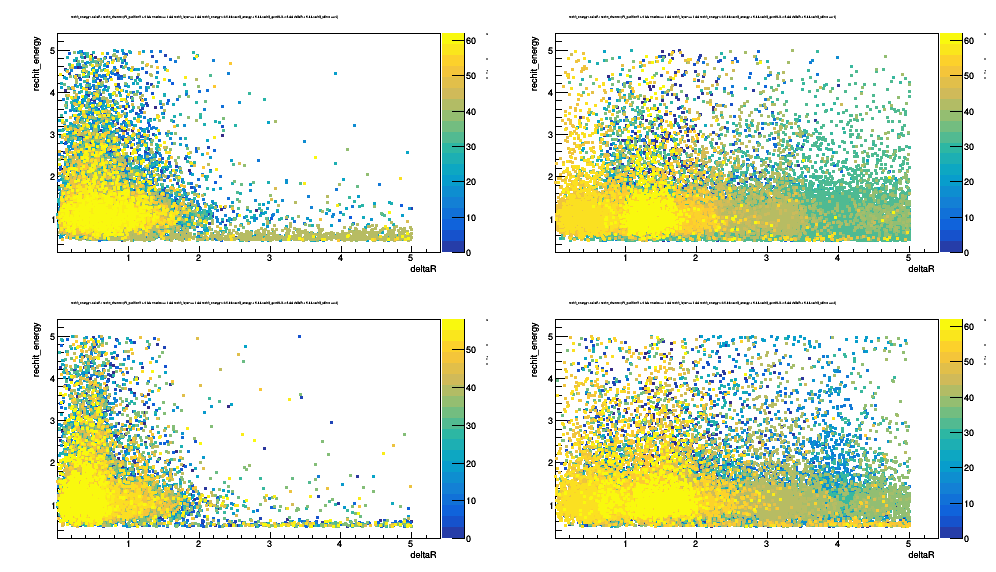

In [8]:
cuts = cutstr + "";

for(int chip = 0; chip < 4; chip++){
    canv_split->cd(chip+1);
 
    cuts = cutstr + " && deltaR < 5 && rechit_skiroc == ";
    cuts += chip;
    cout << cuts << endl;
    tree.Draw("rechit_energy : deltaR : rechit_channel",cuts,"pcolz");
    
}
canv_split->Draw()

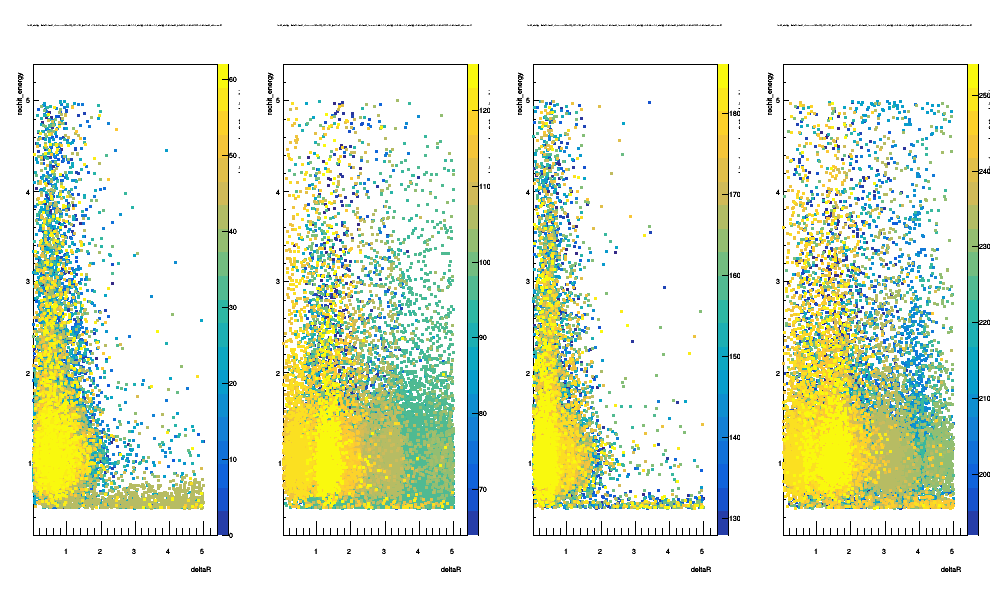

In [16]:
canv_split.SetCanvasSize(1000,600);
canv_split.Draw()

In [10]:
canv = TCanvas()

(TCanvas &) Name: c1 Title: c1


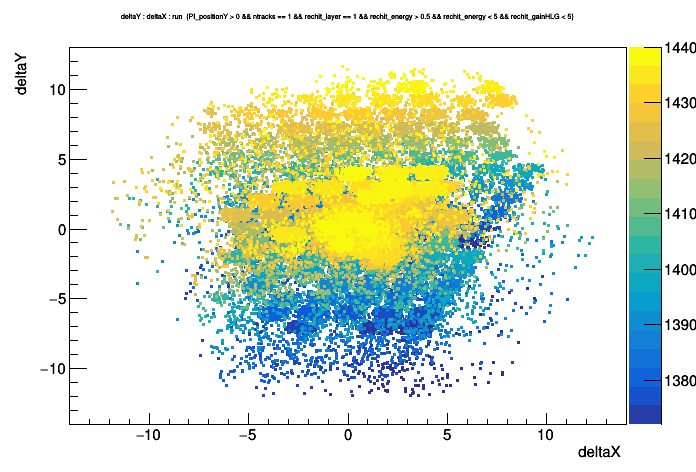

In [7]:
tree.Draw("deltaY : deltaX : run ",cutstr,"pcolz");
canv.Draw()

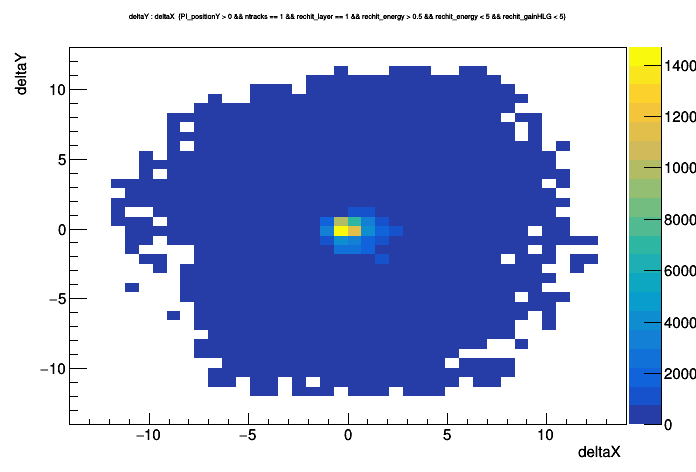

In [8]:
tree.Draw("deltaY : deltaX ",cutstr,"colz");
canv.Draw()

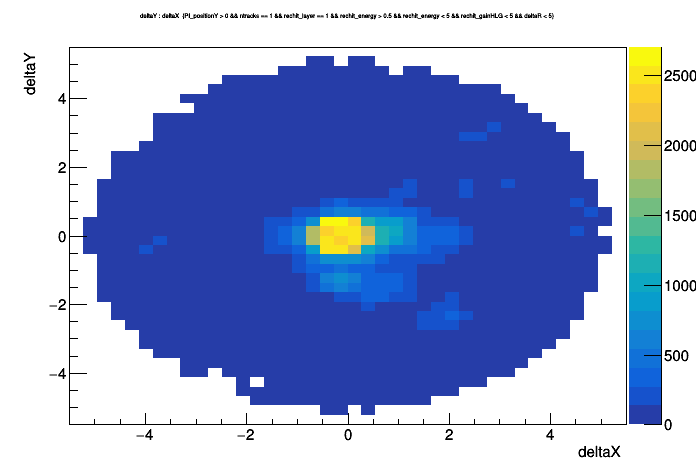

In [9]:
cuts = cutstr + " && deltaR < 5";
tree.Draw("deltaY : deltaX ",cuts,"colz");
canv.Draw()

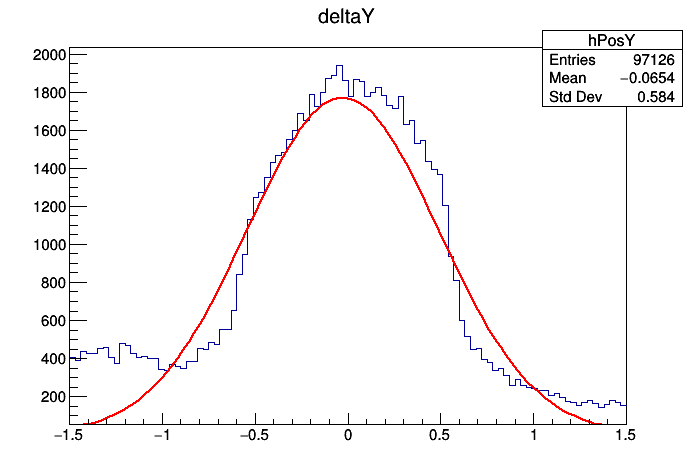

 FCN=6840.22 FROM MIGRAD    STATUS=CONVERGED      76 CALLS          77 TOTAL
                     EDM=2.26317e-07    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     1.76920e+03   9.65698e+00   2.59159e-01   1.01868e-05
   2  Mean        -2.47438e-02   1.96137e-03   7.69341e-05   1.21887e-02
   3  Sigma        5.16095e-01   2.17993e-03   3.48275e-05  -4.48624e-01


In [10]:
//cuts = cutstr + " && deltaR < 0.5";
cuts = cutstr + " && abs(deltaX) < 3 && abs(deltaY) < 3";
//tree.Draw("deltaY : deltaX",cuts,"colz");

hPos = TH1F("hPosY","deltaY", 100,-1.5,1.5);

tree.Draw("deltaY >> hPosY ",cuts,"");

hPos.Fit("gaus");

canv.Draw()

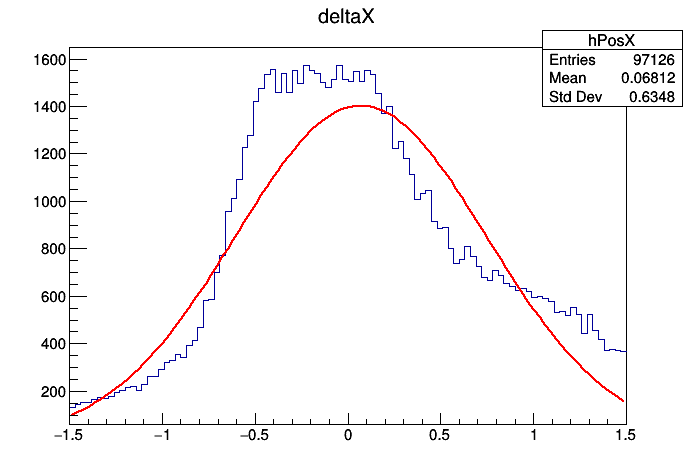

 FCN=4154.38 FROM MIGRAD    STATUS=CONVERGED      62 CALLS          63 TOTAL
                     EDM=1.0185e-06    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     1.40179e+03   7.13366e+00   1.58949e-01   1.13102e-04
   2  Mean         7.20525e-02   2.99266e-03   8.35533e-05  -2.82615e-01
   3  Sigma        6.76522e-01   2.91186e-03   3.09550e-05  -7.97220e-02


In [11]:
//cuts = cutstr + " && deltaR < 0.5";
cuts = cutstr + " && abs(deltaX) < 3 && abs(deltaY) < 3";
//tree.Draw("deltaY : deltaX",cuts,"colz");

hPos = TH1F("hPosX","deltaX", 100,-1.5,1.5);

tree.Draw("deltaX >> hPosX ",cuts,"");

hPos.Fit("gaus");

canv.Draw()

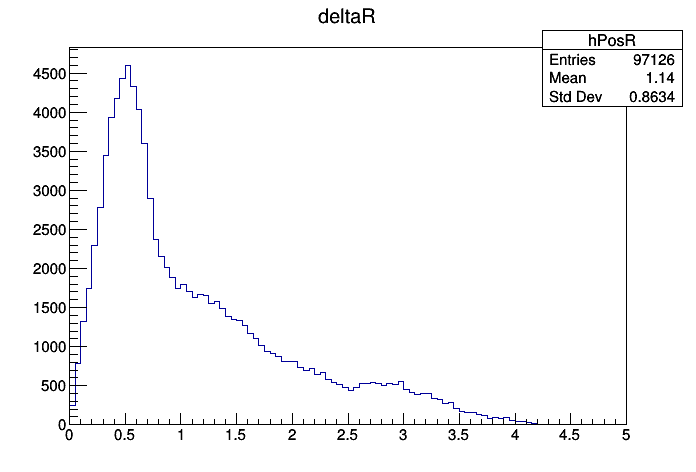

In [12]:
//cuts = cutstr + " && deltaR < 0.5";
cuts = cutstr + " && abs(deltaX) < 3 && abs(deltaY) < 3";
//tree.Draw("deltaY : deltaX",cuts,"colz");

hPos = TH1F("hPosR","deltaR", 100,0,5);

tree.Draw("deltaR >> hPosR ",cuts,"");

//hPos.Fit("gaus");

canv.Draw()

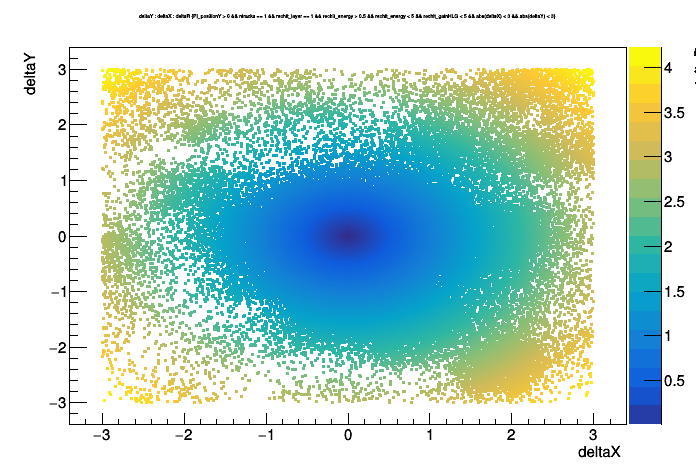

In [13]:
cuts = cutstr + " && abs(deltaX) < 3 && abs(deltaY) < 3";
tree.Draw("deltaY : deltaX : deltaR",cuts,"pcolz");
canv.Draw()

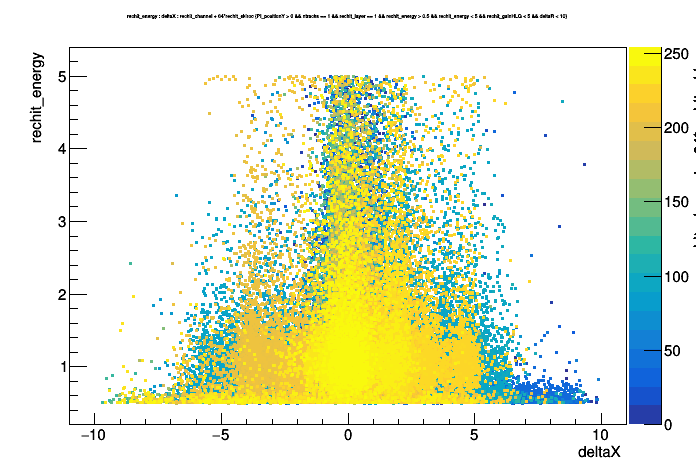

In [14]:
cuts = cutstr + " && deltaR < 10";
tree.Draw("rechit_energy : deltaX : rechit_channel + 64*rechit_skiroc",cuts,"pcolz");
canv.Draw()

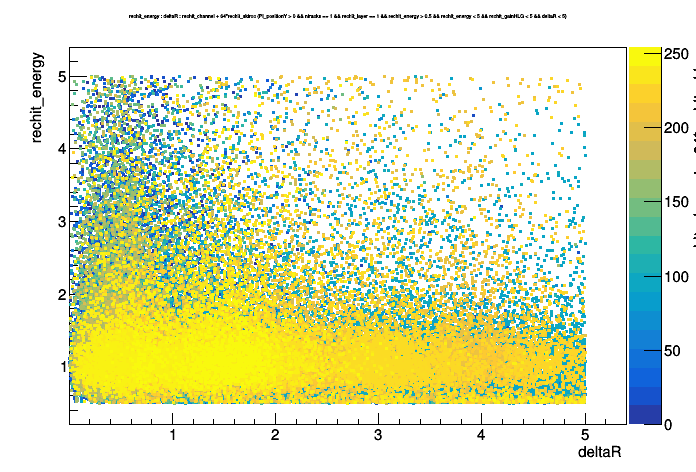

In [17]:
cuts = cutstr + " && deltaR < 5";
tree.Draw("rechit_energy : deltaR : rechit_channel + 64*rechit_skiroc",cuts,"pcolz");
canv.Draw()

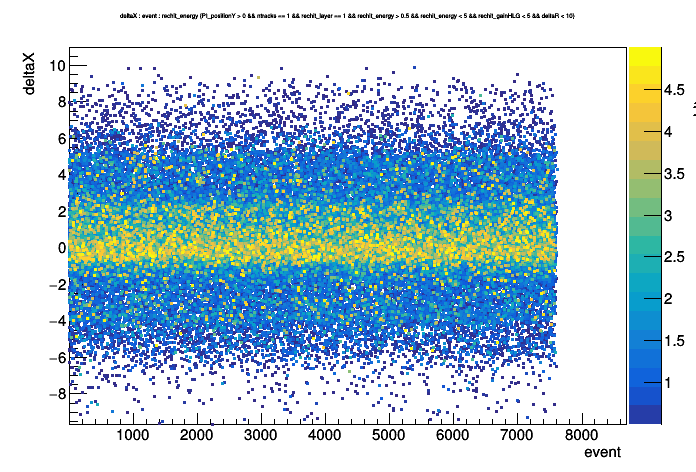

In [23]:
cuts = cutstr + " && deltaR < 10";
tree.Draw("deltaX : event : rechit_energy",cuts,"pcolz");
canv.Draw()

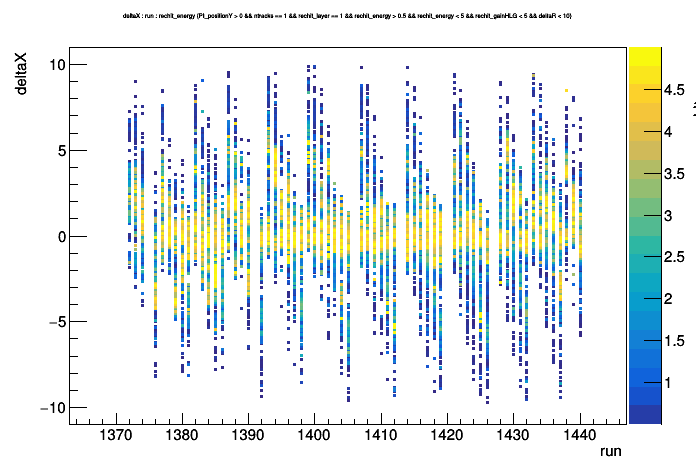

In [25]:
cuts = cutstr + " && deltaR < 10";
tree.Draw("deltaX : run : rechit_energy",cuts,"pcolz");
canv.Draw()

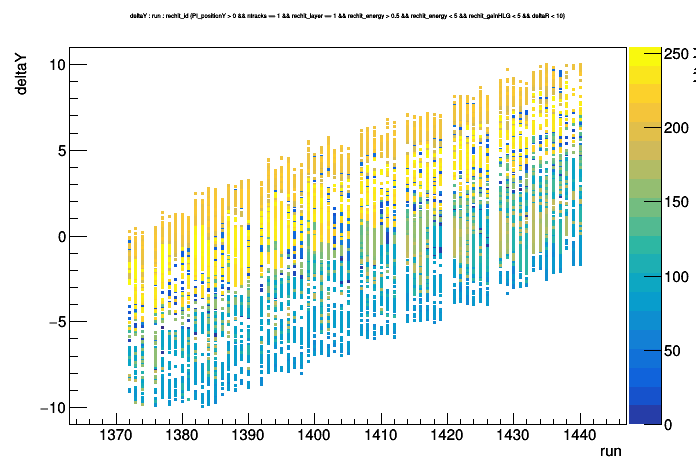

In [41]:
cuts = cutstr + " && deltaR < 10";
tree.Draw("deltaY : run : rechit_id",cuts,"pcolz");
canv.Draw()

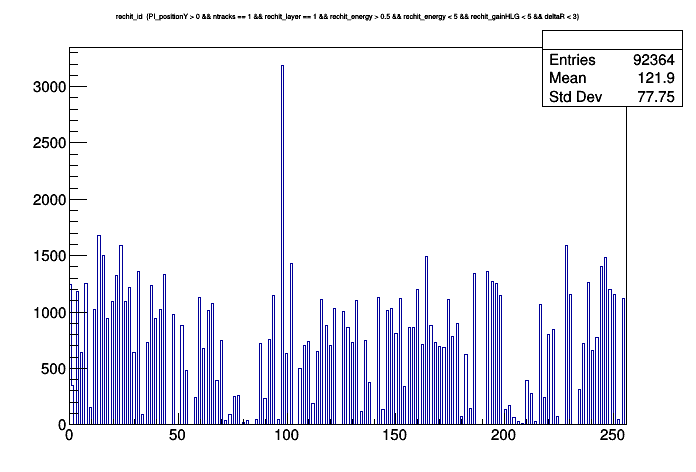

In [34]:
cuts = cutstr + " && deltaR < 3";
tree.Draw("rechit_id >> (255, 0, 256)",cuts,"");
canv.Draw()

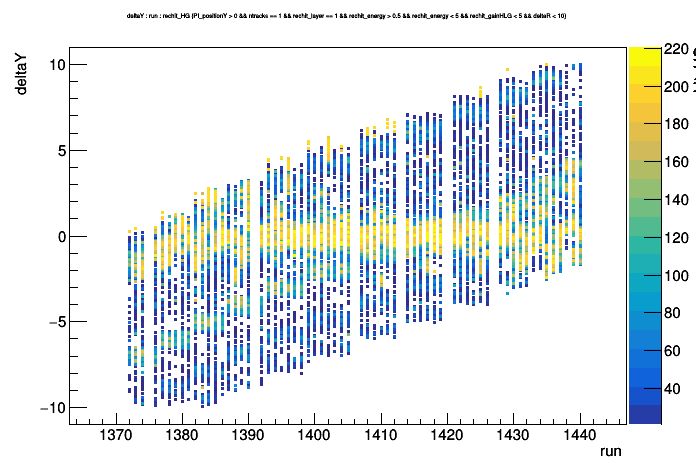

In [36]:
cuts = cutstr + " && deltaR < 10";
tree.Draw("deltaY : run : rechit_HG",cuts,"pcolz");
canv.Draw()

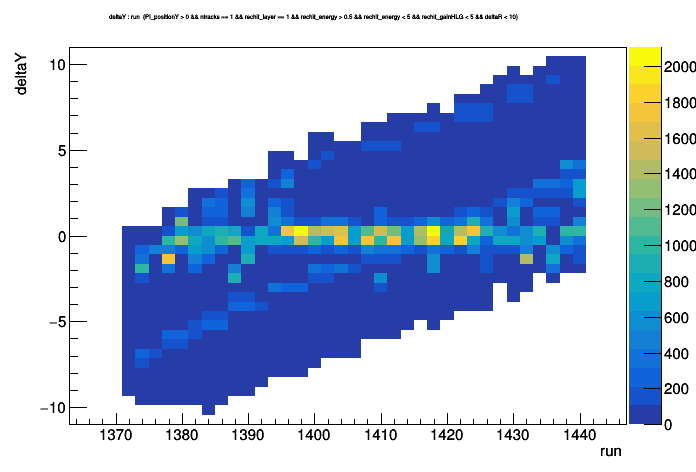

In [38]:
cuts = cutstr + " && deltaR < 10";
tree.Draw("deltaY : run ",cuts,"colz");
canv.Draw()

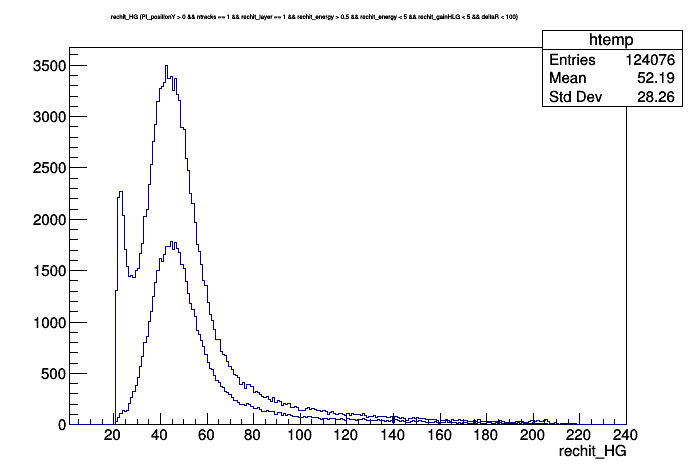

In [40]:
cuts = cutstr + " && deltaR < 100";
tree.Draw("rechit_HG",cuts,"");

cuts = cutstr + " && deltaR < 1.5";
tree.Draw("rechit_HG",cuts,"same");

canv.Draw()

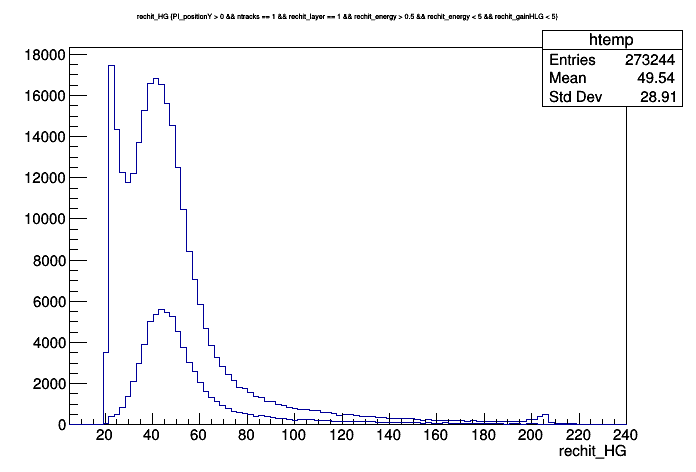

In [11]:
cuts = cutstr + "";
tree.Draw("rechit_HG",cuts,"");

cuts = cutstr + " && deltaR < 1.5";
tree.Draw("rechit_HG",cuts,"same");

canv.Draw()

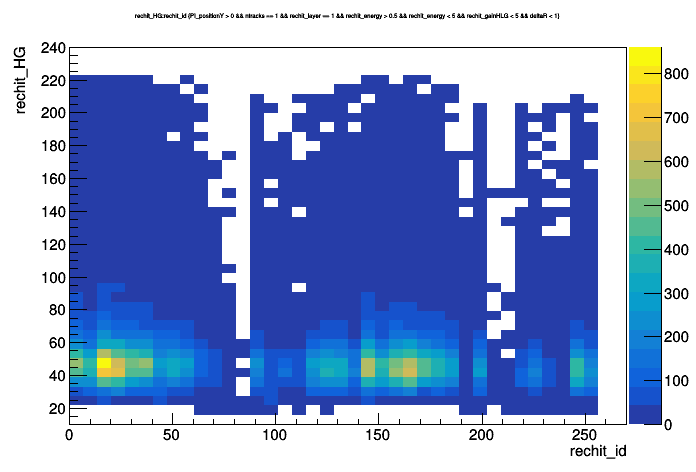

In [42]:
cuts = cutstr + " && deltaR < 1";
tree.Draw("rechit_HG:rechit_id",cuts,"colz");

canv.Draw()

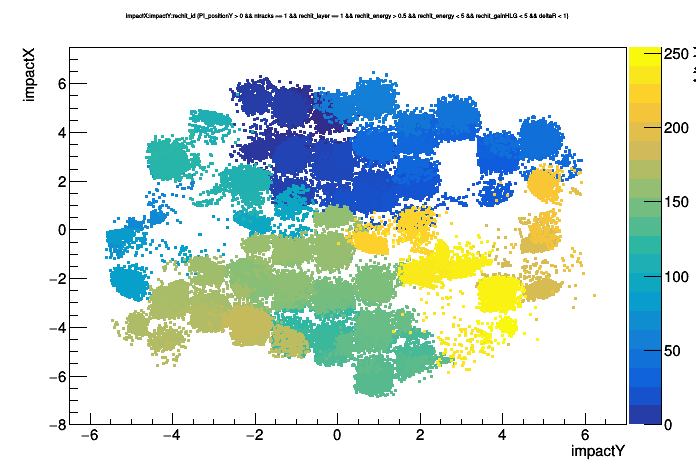

In [43]:
cuts = cutstr + " && deltaR < 1";
tree.Draw("impactX:impactY:rechit_id",cuts,"pcolz");

canv.Draw()